# Tensorflow regression example
This uses the Boston housing dataset part of sklearn.
This makes use the the scale function part of sklearn.preprocessing

In [11]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

In [12]:
print('Using Tensorflow version {}.'.format(tf.__version__))

Using Tensorflow version 1.5.1.


In [13]:
# Get the data
total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

In [15]:
print(test_features.shape)
print(test_prices.shape)

(106, 13)
(106,)


In [16]:
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [17]:
def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w)) # b + XW
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [18]:
y, cost = calc(train_features, train_prices)

# Feel free to tweak these 2 values:
learning_rate = 0.025
epochs = 3000
points = [[], []] # You'll see later why I need this

In [19]:
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

670.967553251
78.7644258343
78.7263921149
78.7254208545
78.7253179224
78.7253019034
78.7252989762
78.7252983906
78.7252982631
78.7252982329
78.7252982252
78.7252982231
78.7252982225
78.7252982223
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222
78.7252982222


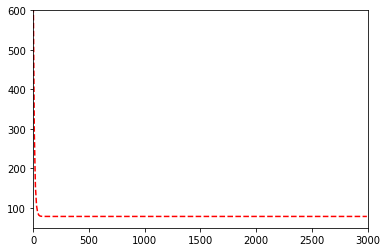

Validation error = 104.343677778 



In [20]:
with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print(sess.run(cost))

    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    # print('Test error =', sess.run(test_cost), '\n')